##Ciência de Dados
Análise Exploratória de Dados


Nesta aula, vamos mostrar como descrevemos os dados em termos de medidas de estatística. Medidas de posição, dispersão e correlação serão descritas, com aplicações em diferentes conjuntos de dados.

1. Visualização
Uma das maneiras mais simples de visualizar a distribuição dos dados é através de gráficos de frequência e histogramas.

Um exemplo de um gráfico de frequência:

In [11]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Pandas Python Data System

In [ ]:
nomes = ['Ana', 'Bruno', 'Carla']
idades = [21, 20, 22]
dados = list(zip(nomes, idades))
print(dados)

In [ ]:
df = pd.DataFrame(data = dados)
print(df)

In [ ]:
dados=[("A","ANTONIO",27),("B","MARCUS",17),("C","MARIA AMELIA",9),("D","RONAN",7)]
df=pd.DataFrame(data=dados)
df.head()

In [ ]:
print("Quantos itens ao todo: ",df.size)
print("Linhas e Colunas: ",df.shape)

In [ ]:
# Endereço web do arquivo, mas poderia ser local.
url = "http://leg.ufpr.br/~walmes/data/euro_football_players.txt"
# Importa a tabela de dados.
tb = pd.read_table(filepath_or_buffer = url, sep = "\t",  comment = "#")
tb.head(n = 6)

In [ ]:
tb.info()

In [ ]:
tb.sort_values(by = "name", ascending = True)

In [ ]:
#ordenando por duas variáveis
tb.sort_values(by = ["name","team"], ascending = True)   ##//ascending = [True, True])

In [19]:
#ordenando e salvando ordenação
tb.sort_values(by = ["name"], inplace = True)


###Selecionando colunas para um novo dataframe

In [ ]:
df2=tb[['name','team','country']]
df2.head()

In [ ]:
#usando iloc para selecionar colunas
df2=tb.loc[:, ['name','team','country']]
df2.head()

#Numpy, MatplotLlib, seaborn

###Distribuição de frequencia

temos 10 intervalos (num_bins=10) de 10 em 10 (0 a 10, 10 a 20, etc.
<p> Vamos contar o numero de vezes que um numero pertence ao intervalo

In [ ]:
x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
fig= plt.figure(figsize=(6,4))
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5, density=False, edgecolor='black', linewidth=1.2)
plt.xlabel("X", fontsize = 15)
plt.ylabel("Frequencia", fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

No caso de variáveis nominais, podemos usar gráficos de barra ou gráficos de setores. Notem que o valor no eixo das abscissas (x) é arbitrário e não deve ser levando em conta.


In [ ]:
Y = ["Bom", "Ruim", "Ótimo", "Regular", "Regular", "Ótimo", "Ótimo","Bom", "Ótimo", "Bom", "Ótimo"]
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos
values = np.sort(np.unique(Y)) #usamos a funções sort e unique do Numpy para encontrar os valores possíveis.
# vamos calcular a frequência de cada valor presente na lista
freq = np.zeros(len(values)) # armazena as frequencias
ind = 0 # indice do vetor de frequências
for i in values: # para os valores diferentes
    counter = 0 # conta as ocorrências
    for j in range(0,len(Y)):
        if(Y[j] == i):
            counter = counter + 1
    freq[ind] = counter
    ind = ind + 1

print('Y:',Y)
print('Valores possíveis:', values)
print('Frequencia dos valores:', freq)

fig= plt.figure(figsize=(6,4))


y_pos = np.arange(len(values))
plt.xticks(y_pos, values)
plt.bar(y_pos, freq)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Valores",fontsize = 15)
plt.ylabel("Frequência", fontsize = 15)
plt.show()


Gráfico de setores:

In [ ]:
print(values)
print(freq)

In [ ]:
labels = values
sizes = freq
explode = (0.1, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Outro gráfico importante é o scatterplot, usado quando queremos verificar a relação entre duas variáveis.

In [ ]:
N = 100
X = np.linspace(-1,1, N) # gera N valores em [-1,1]
erro = np.random.uniform(-1,1,N) # ruído a ser incluído na relação linear.
sigma= 0.5
Y = 0.8*X + erro*sigma

fig= plt.figure(figsize=(6,4))

plt.scatter(X, Y, marker='o', color = 'red');
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("X",fontsize = 15)
plt.ylabel("Y", fontsize = 15)
plt.show()

####Podemos ter um gráfico com 3 dados :voos, meses e numero de passageiros
https://seaborn.pydata.org/tutorial/data_structure.html


In [5]:
np.random.seed(0)
sns.set()
uniform_data = np.random.rand(10, 12)
plt.figure(figsize=(12,6))
flights = sns.load_dataset("flights")
flights.head()


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<Figure size 1200x600 with 0 Axes>

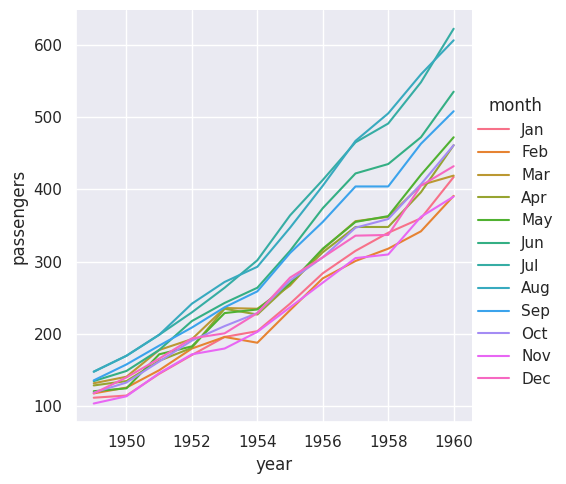

In [6]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")
sns.set_theme()
# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = (
    flights_long
    .pivot(index="month", columns="year", values="passengers")
)

In [7]:
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


<Axes: xlabel='year', ylabel='month'>

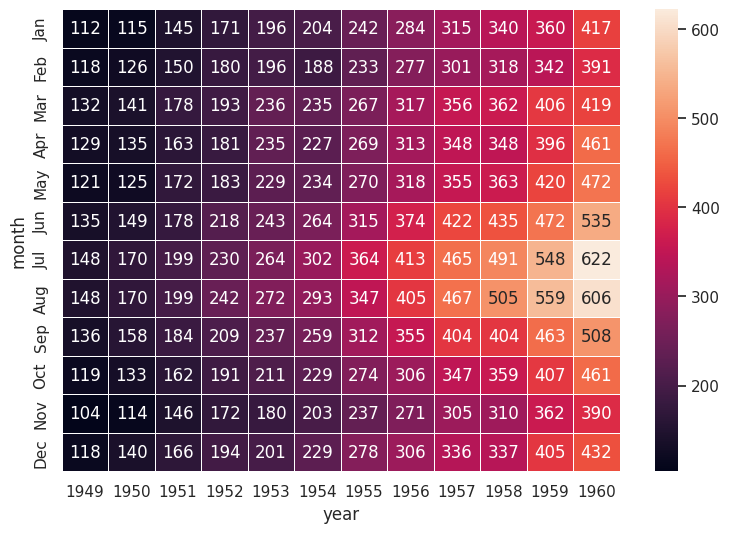

In [8]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

# Mais sobre pandas
http://www.leg.ufpr.br/~walmes/ensino/dsbd-linprog/slides/01-python-pandas.html#64